In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Data Cleaning

In [99]:
income_data = pd.read_csv('Metadata_Country_API_SI.POV.NAHC_DS2_en_csv_v2_171.csv')
income_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [100]:
cols_to_keep = ["Country Code", "Region", "IncomeGroup", "SpecialNotes", "TableName"]
income_data = income_data[cols_to_keep]

In [101]:
income_data[["Region", "IncomeGroup", "TableName"]] = (
    income_data[["Region", "IncomeGroup", "TableName"]].fillna("Unknown")
)
income_data["SpecialNotes"] = income_data["SpecialNotes"].fillna("")

In [102]:
income_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,,Aruba
1,AFE,Unknown,Unknown,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,Unknown,Unknown,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


In [103]:
poverty_data = pd.read_csv('World_Bank_Poverty_data.csv')
poverty_data.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,Last Updated Date,10/7/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
3,Aruba,ABW,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#Resetting the index to the second row since that is the actual title of the columns
poverty_data.columns = poverty_data.iloc[2]
# Drop all rows before the actual data
poverty_data = poverty_data.drop([0, 1])
# Reset the index
poverty_data = poverty_data.reset_index(drop=True)
poverty_data = poverty_data.dropna(axis=1, how='all')

# Check results
poverty_data.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
0,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
1,Aruba,ABW,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,54.5,NaN,NaN,47.1,NaN,NaN,NaN,NaN,NaN
4,Africa Western and Central,AFW,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
poverty_data = poverty_data.drop(0)
# Convert column names that look like years into numeric
year_cols = [col for col in poverty_data.columns if str(col).replace('.0', '').isdigit()]

# Filter to years between 2020 and 2024
year_cols_filtered = [col for col in year_cols if 2020 <= int(float(col)) <= 2024]

# Keep identifying columns + filtered year columns
id_cols = ['Country Name', 'Country Code']
poverty_data_filtered = poverty_data[id_cols + year_cols_filtered]

In [106]:
poverty_data_filtered

2,Country Name,Country Code,2020.0,2021.0,2022.0,2023.0,2024.0
1,Aruba,ABW,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN
4,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN
5,Angola,AGO,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
262,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN
263,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN
264,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN
265,Zambia,ZMB,NaN,NaN,60.0,NaN,NaN


In [107]:
year_cols = [2020.0, 2021.0, 2022.0, 2023.0]
poverty_data_final = poverty_data_filtered[poverty_data_filtered[year_cols].notna().all(axis=1)]
poverty_data_final

2,Country Name,Country Code,2020.0,2021.0,2022.0,2023.0,2024.0
10,Argentina,ARG,42.0,37.3,39.2,41.7,38.1
11,Armenia,ARM,27.0,26.5,24.8,23.7,NaN
22,Bulgaria,BGR,22.1,22.9,20.6,21.7,NaN
29,Bolivia,BOL,39.0,36.4,37.7,36.5,NaN
46,Colombia,COL,43.1,39.7,36.6,34.6,31.8
49,Costa Rica,CRI,30.0,26.2,25.5,24.4,20.3
60,Dominican Republic,DOM,30.4,30.7,27.7,23.0,19.0
67,Ecuador,ECU,33.0,27.7,25.2,26.0,28.0
83,Georgia,GEO,21.3,17.5,15.6,11.8,9.4
107,Indonesia,IDN,9.8,10.1,9.5,9.4,9.0


In [108]:
# Select only the columns that are neseccary from income_data
income_subset = income_data[["Country Code", "Region", "IncomeGroup"]]

# Merge based on "Country Code"
primary_data = pd.merge(
    poverty_data_final,
    income_subset,
    on="Country Code",
    how="left")

In [109]:
primary_data[primary_data.Region == 'Latin America & Caribbean']

,Country Name,Country Code,2020.0,2021.0,2022.0,2023.0,2024.0,Region,IncomeGroup
0,Argentina,ARG,42.0,37.3,39.2,41.7,38.1,Latin America & Caribbean,Upper middle income
3,Bolivia,BOL,39.0,36.4,37.7,36.5,NaN,Latin America & Caribbean,Lower middle income
4,Colombia,COL,43.1,39.7,36.6,34.6,31.8,Latin America & Caribbean,Upper middle income
5,Costa Rica,CRI,30.0,26.2,25.5,24.4,20.3,Latin America & Caribbean,High income
6,Dominican Republic,DOM,30.4,30.7,27.7,23.0,19.0,Latin America & Caribbean,Upper middle income
7,Ecuador,ECU,33.0,27.7,25.2,26.0,28.0,Latin America & Caribbean,Upper middle income
14,Peru,PER,30.1,25.9,27.5,29.0,27.6,Latin America & Caribbean,Upper middle income
17,El Salvador,SLV,26.2,24.6,26.6,27.2,NaN,Latin America & Caribbean,Upper middle income


In [110]:
primary_data = primary_data[primary_data.Region == 'Europe & Central Asia']
primary_data

,Country Name,Country Code,2020.0,2021.0,2022.0,2023.0,2024.0,Region,IncomeGroup
1,Armenia,ARM,27.0,26.5,24.8,23.7,NaN,Europe & Central Asia,Upper middle income
2,Bulgaria,BGR,22.1,22.9,20.6,21.7,NaN,Europe & Central Asia,High income
8,Georgia,GEO,21.3,17.5,15.6,11.8,9.4,Europe & Central Asia,Upper middle income
10,Kazakhstan,KAZ,5.3,5.2,5.2,5.2,5.0,Europe & Central Asia,Upper middle income
11,Moldova,MDA,26.8,24.5,31.1,31.6,NaN,Europe & Central Asia,Upper middle income
13,Montenegro,MNE,21.2,20.3,20.1,20.0,NaN,Europe & Central Asia,Upper middle income
15,Poland,POL,11.8,12.1,11.7,12.2,13.3,Europe & Central Asia,High income
16,Romania,ROU,22.5,21.2,21.1,19.0,NaN,Europe & Central Asia,High income
18,Serbia,SRB,21.4,20.2,19.9,19.7,NaN,Europe & Central Asia,Upper middle income
19,Turkiye,TUR,14.4,14.4,13.5,13.6,NaN,Europe & Central Asia,Upper middle income


Based on the dataset filtered by region, Europe and Central Asia emerge as the most suitable regions for evaluation in this study. This choice is supported by the fact that these regions have the largest number of available data points. Additionally, examining poverty trends and their relationship with nutrition in high- and upper-middle-income countries is particularly compelling, as poverty manifests differently in more developed economies. The analysis is further strengthened by the relative comparability of these countries: despite variations in national poverty lines, they share similar income ranges, geographic conditions, levels of political stability, and economic structures—making cross-country comparisons both meaningful and insightful.

In [111]:
primary_data['Mean_Poverty_2020-2023'] = primary_data[year_cols[:4]].mean(axis=1)

In [112]:
primary_data

,Country Name,Country Code,2020.0,2021.0,2022.0,2023.0,2024.0,Region,IncomeGroup,Mean_Poverty_2020-2023
1,Armenia,ARM,27.0,26.5,24.8,23.7,NaN,Europe & Central Asia,Upper middle income,25.500
2,Bulgaria,BGR,22.1,22.9,20.6,21.7,NaN,Europe & Central Asia,High income,21.825
8,Georgia,GEO,21.3,17.5,15.6,11.8,9.4,Europe & Central Asia,Upper middle income,16.550
10,Kazakhstan,KAZ,5.3,5.2,5.2,5.2,5.0,Europe & Central Asia,Upper middle income,5.225
11,Moldova,MDA,26.8,24.5,31.1,31.6,NaN,Europe & Central Asia,Upper middle income,28.500
13,Montenegro,MNE,21.2,20.3,20.1,20.0,NaN,Europe & Central Asia,Upper middle income,20.400
15,Poland,POL,11.8,12.1,11.7,12.2,13.3,Europe & Central Asia,High income,11.950
16,Romania,ROU,22.5,21.2,21.1,19.0,NaN,Europe & Central Asia,High income,20.950
18,Serbia,SRB,21.4,20.2,19.9,19.7,NaN,Europe & Central Asia,Upper middle income,20.300
19,Turkiye,TUR,14.4,14.4,13.5,13.6,NaN,Europe & Central Asia,Upper middle income,13.975


# Univariate Analysis

In [113]:
primary_data[year_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
2020.0,10.0,19.38,6.846215,5.3,16.100,21.35,22.400,27.0
2021.0,10.0,18.48,6.398229,5.2,15.175,20.25,22.475,26.5
2022.0,10.0,18.36,7.230214,5.2,14.025,20.00,20.975,31.1
2023.0,10.0,17.85,7.409341,5.2,12.550,19.35,21.275,31.6


Understanding what years have missing data from the original dataset and whether there is a systematic reason behind them or its random. This can be useful to consider so that we know that we are not ignoring any systemtic biases by only analysing a specfic time frame.

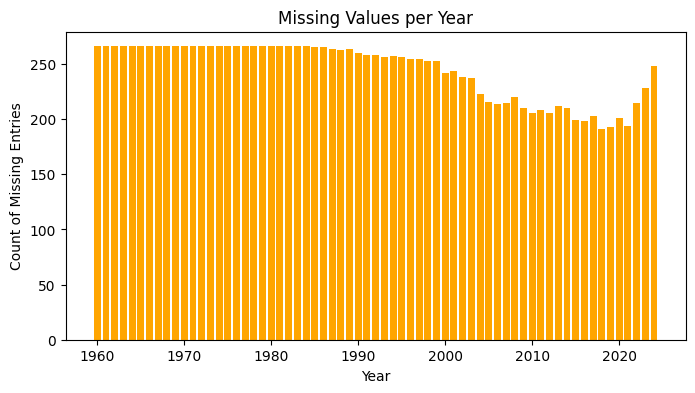

In [114]:
year_cols_2 = [col for col in poverty_data.columns if str(col).replace('.0','').isdigit()]
missing = poverty_data[year_cols_2].isna().sum()
plt.figure(figsize=(8,4))
plt.bar(missing.index, missing.values, color="orange")
plt.title("Missing Values per Year")
plt.xlabel("Year")
plt.ylabel("Count of Missing Entries")
plt.show()

Next we will analyse the skewness and Kurtosis of our data

In [118]:
stats_df = pd.DataFrame({
    "Skewness": primary_data[year_cols].skew(),
    "Kurtosis": primary_data[year_cols].kurt()
})
print(stats_df)

        Skewness  Kurtosis
2020.0 -1.050701  0.609378
2021.0 -0.964533  0.732502
2022.0 -0.123000  0.511464
2023.0  0.126955  0.401355


/var/folders/9c/k6w1d04x6fb6ym54hylxk2r40000gn/T/ipykernel_12448/2325765518.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


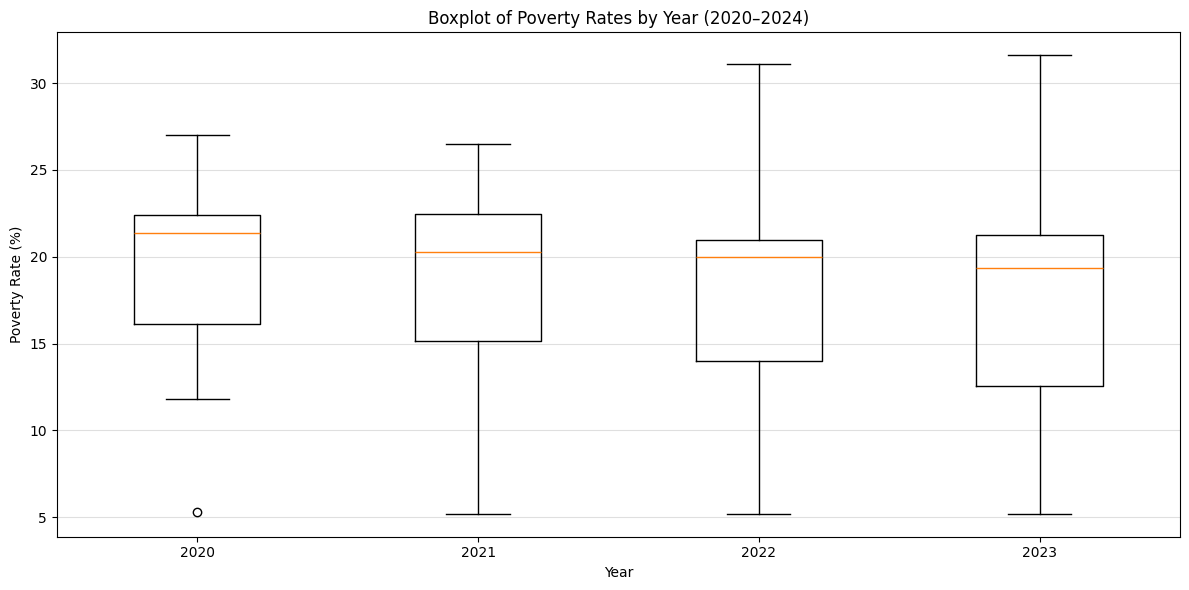

In [123]:
plt.figure(figsize=(12,6))

# Convert column names to strings for labeling
plt.boxplot(
    [primary_data[year].dropna() for year in year_cols],
    labels=[str(year)[:4] for year in year_cols]  # ensures safe string slicing
)

plt.title("Boxplot of Poverty Rates by Year (2020–2024)")
plt.xlabel("Year")
plt.ylabel("Poverty Rate (%)")
plt.grid(axis="y", alpha=0.4)
plt.tight_layout()
plt.show()


# Bivariate Analysis

Using the corr function to determine how consistent poverty rates were over the three years (2020-2023). A high correlation (close to 1) suggests that poverty rankings across countries were stable over time.

In [129]:
corr = primary_data[[2020.0, 2021.0, 2022.0, 2023.0, 2024.0]].corr()
print(corr)

          2020.0    2021.0    2022.0    2023.0    2024.0
2020.0  1.000000  0.981288  0.940977  0.873539  0.435444
2021.0  0.981288  1.000000  0.939850  0.900577  0.588059
2022.0  0.940977  0.939850  1.000000  0.980358  0.645527
2023.0  0.873539  0.900577  0.980358  1.000000  0.905630
2024.0  0.435444  0.588059  0.645527  0.905630  1.000000


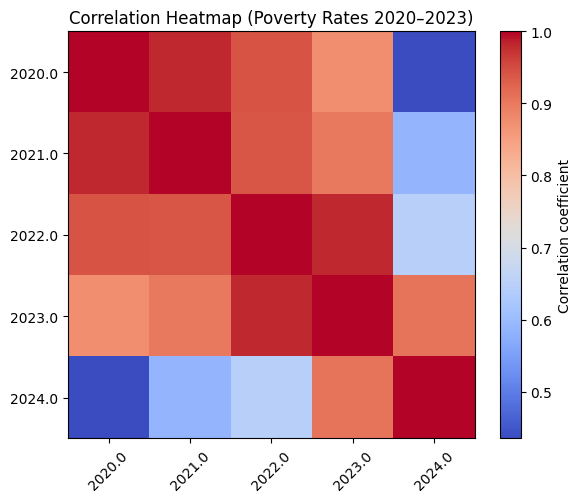

In [132]:
plt.figure(figsize=(6, 5))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation coefficient')

# Add labels
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap (Poverty Rates 2020–2023)')
plt.tight_layout()
plt.show()

How does Poverty Level differ by Income Group?

<Figure size 800x500 with 0 Axes>

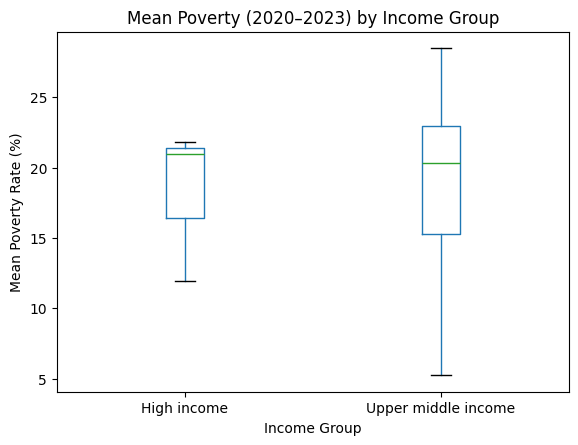

In [134]:
plt.figure(figsize=(8, 5))
primary_data.boxplot(column='Mean_Poverty_2020-2023', by='IncomeGroup', grid=False)
plt.title('Mean Poverty (2020–2023) by Income Group')
plt.suptitle('')
plt.xlabel('Income Group')
plt.ylabel('Mean Poverty Rate (%)')
plt.show()

In [135]:
income_poverty = primary_data.groupby('IncomeGroup')['Mean_Poverty_2020-2023'].agg(['mean', 'std', 'count']).reset_index()
income_poverty

,IncomeGroup,mean,std,count
0,High income,18.241667,5.466279,3
1,Upper middle income,18.635714,7.705245,7


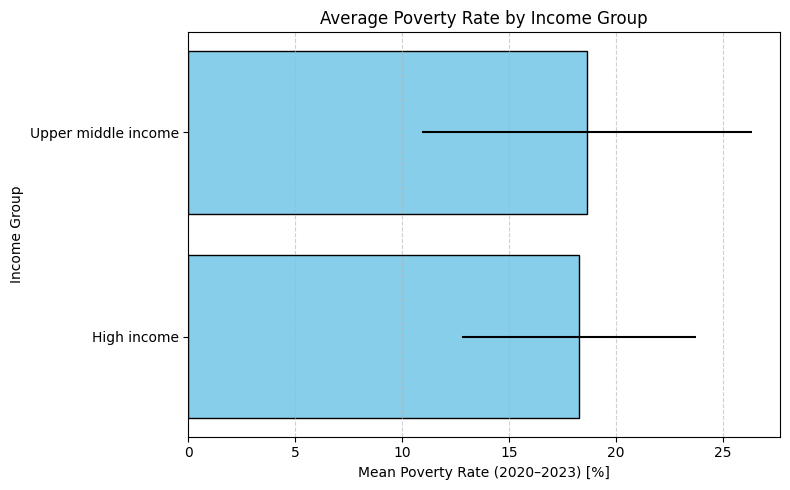

In [136]:
plt.figure(figsize=(8, 5))
plt.barh(income_poverty['IncomeGroup'], income_poverty['mean'],
         xerr=income_poverty['std'], color='skyblue', edgecolor='black')

plt.xlabel('Mean Poverty Rate (2020–2023) [%]')
plt.ylabel('Income Group')
plt.title('Average Poverty Rate by Income Group')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

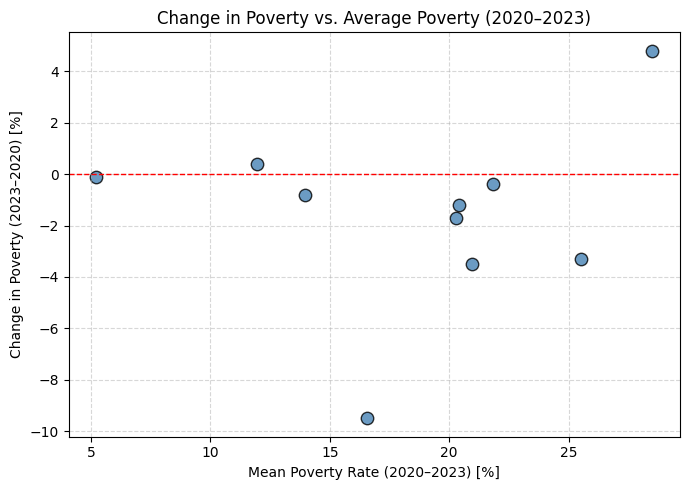

In [141]:
primary_data['Poverty_Change_2020_2023'] = primary_data[2023.0] - primary_data[2020.0]

plt.figure(figsize=(7,5))
plt.scatter(primary_data['Mean_Poverty_2020-2023'],
            primary_data['Poverty_Change_2020_2023'],
            color='steelblue', s=80, edgecolors='black', alpha=0.8)

plt.axhline(0, color='red', linestyle='--', linewidth=1)

plt.title('Change in Poverty vs. Average Poverty (2020–2023)')
plt.xlabel('Mean Poverty Rate (2020–2023) [%]')
plt.ylabel('Change in Poverty (2023–2020) [%]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()